### 1 Find London Bourough

In [140]:
import os
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

import matplotlib.cm as cm
import math
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

In [2]:
#Grab the Borough Boundaries
boros = gpd.read_file('https://github.com/jreades/i2p/blob/master/data/src/Boroughs.gpkg?raw=true')
boros

/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,"MULTIPOLYGON (((516401.600 160201.800, 516407...."
1,Croydon,E09000008,8649.441,0.000,F,"MULTIPOLYGON (((535009.200 159504.700, 535005...."
2,Bromley,E09000006,15013.487,0.000,F,"MULTIPOLYGON (((540373.600 157530.400, 540361...."
3,Hounslow,E09000018,5658.541,60.755,F,"MULTIPOLYGON (((521975.800 178100.000, 521967...."
4,Ealing,E09000009,5554.428,0.000,F,"MULTIPOLYGON (((510253.500 182881.600, 510249...."
5,Havering,E09000016,11445.735,210.763,F,"MULTIPOLYGON (((549893.900 181459.800, 549894...."
6,Hillingdon,E09000017,11570.063,0.000,F,"MULTIPOLYGON (((510599.800 191689.500, 510615...."
7,Harrow,E09000015,5046.330,0.000,F,"MULTIPOLYGON (((510599.800 191689.500, 510660...."
8,Brent,E09000005,4323.270,0.000,F,"MULTIPOLYGON (((525201.000 182512.600, 525181...."
9,Barnet,E09000003,8674.837,0.000,F,"MULTIPOLYGON (((524579.900 198355.200, 524594...."


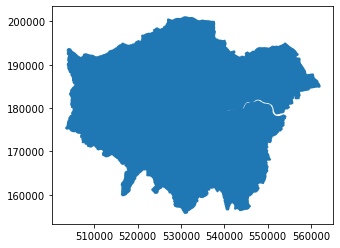

In [3]:
ldn = gpd.GeoDataFrame(gpd.GeoSeries(data=boros.unary_union, crs='epsg:27700')).rename(columns={0:'original'})

# get all MSOAs _within_ London 
# buffer the boundary by 250m.
ldn['geometry'] = ldn.original.buffer(250)
ldn = ldn.set_geometry('geometry')
ldn.plot();

In [4]:
#Grab the Borough Boundaries
boros = gpd.read_file('https://github.com/jreades/i2p/blob/master/data/src/Boroughs.gpkg?raw=true')
boros

/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,"MULTIPOLYGON (((516401.600 160201.800, 516407...."
1,Croydon,E09000008,8649.441,0.000,F,"MULTIPOLYGON (((535009.200 159504.700, 535005...."
2,Bromley,E09000006,15013.487,0.000,F,"MULTIPOLYGON (((540373.600 157530.400, 540361...."
3,Hounslow,E09000018,5658.541,60.755,F,"MULTIPOLYGON (((521975.800 178100.000, 521967...."
4,Ealing,E09000009,5554.428,0.000,F,"MULTIPOLYGON (((510253.500 182881.600, 510249...."
5,Havering,E09000016,11445.735,210.763,F,"MULTIPOLYGON (((549893.900 181459.800, 549894...."
6,Hillingdon,E09000017,11570.063,0.000,F,"MULTIPOLYGON (((510599.800 191689.500, 510615...."
7,Harrow,E09000015,5046.330,0.000,F,"MULTIPOLYGON (((510599.800 191689.500, 510660...."
8,Brent,E09000005,4323.270,0.000,F,"MULTIPOLYGON (((525201.000 182512.600, 525181...."
9,Barnet,E09000003,8674.837,0.000,F,"MULTIPOLYGON (((524579.900 198355.200, 524594...."


#### LOAD DATASETS

In [8]:
#load london house mean prices dataset
url = 'https://raw.githubusercontent.com/mrborin/CASA007QM/main/land-registry-house-prices-borough.csv'
df_houseprice = pd.read_csv(url, low_memory=False,thousands=',' )
df_houseprice

,Code,Area,Year ending Dec 1995,Year ending Mar 1996,Year ending Jun 1996,Year ending Sep 1996,Year ending Dec 1996,Year ending Mar 1997,Year ending Jun 1997,Year ending Sep 1997,...,Year ending Sep 2015,Year ending Dec 2015,Year ending Mar 2016,Year ending Jun 2016,Year ending Sep 2016,Year ending Dec 2016,Year ending Mar 2017,Year ending Jun 2017,Year ending Sep 2017,Year ending Dec 2017
0,E09000001,City of London,146043,148413,139566,131873,136344,142328,148007,149608,...,929347,926292,935604,917834,895825,928037,929037,953512,961783,950760
1,E09000002,Barking and Dagenham,50615,50589,50972,51680,51680,52225,53081,54582,...,234226,244126,254179,265260,275923,289176,299383,301708,302686,301518
2,E09000003,Barnet,111019,111312,110356,110408,111203,114975,120432,128540,...,553003,566874,576762,582039,581036,584202,590823,616325,638641,667593
3,E09000004,Bexley,66294,66237,66892,67535,69941,71221,72937,74479,...,285822,295262,306399,319770,331444,340626,345354,347505,352460,357779
4,E09000005,Brent,77258,78576,79455,81030,82824,85174,87618,91095,...,494092,506322,515414,517225,526828,517497,518109,536120,547212,578705
5,E09000006,Bromley,93441,94248,94768,96802,97597,98496,99637,102123,...,429597,441675,451676,461829,469729,478142,483847,489823,496853,502623
6,E09000007,Camden,151364,150180,155522,164692,168988,176378,181088,182975,...,1041169,1040035,1085177,1088629,1045917,1063248,1029438,1082928,1121810,1099876
7,E09000008,Croydon,71800,72145,73119,74630,75678,77097,78531,81044,...,328459,340768,350929,357942,366448,372054,377366,385383,395862,399645
8,E09000009,Ealing,91045,90306,90963,93989,97595,99959,103396,108733,...,509376,524967,539608,542632,546006,553669,552560,568092,577818,578110
9,E09000010,Enfield,78510,77819,79326,80649,82956,85450,89034,92547,...,378790,389903,404433,419358,438829,450294,459261,464622,461150,463806


In [73]:
#load london crime dataset
url = 'https://data.london.gov.uk/download/recorded_crime_summary/2bbd58c7-6be6-40ac-99ed-38c0ee411c8e/MPS_Borough_Level_Crime_Historic.csv'
df_crime_original = pd.read_csv(url, low_memory=False,thousands=',' )

In [36]:
df_crime = df_crime_original.groupby(['Borough','Major Category']).sum().reset_index()
df_crime
#df_crime.columns.values.tolist()

,Borough,Major Category,200801,200802,200803,200804,200805,200806,200807,200808,...,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812
0,Barking and Dagenham,Burglary,141,139,143,127,131,142,157,133,...,183,140,132,129,134,120,149,155,166,213
1,Barking and Dagenham,Criminal Damage,294,279,246,300,260,237,257,256,...,128,133,139,141,144,110,117,145,114,94
2,Barking and Dagenham,Drugs,102,122,99,146,108,136,146,212,...,82,73,80,73,82,77,81,69,79,68
3,Barking and Dagenham,Fraud or Forgery,93,119,99,118,76,110,116,124,...,6,3,2,2,0,0,2,1,2,1
4,Barking and Dagenham,Other Notifiable Offences,16,22,27,23,19,30,24,23,...,38,34,39,36,39,28,25,20,31,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Westminster,Other Notifiable Offences,61,54,85,74,69,72,79,79,...,58,58,61,73,88,65,59,79,73,69
284,Westminster,Robbery,118,146,130,153,136,141,130,137,...,208,216,273,243,287,248,270,312,339,411
285,Westminster,Sexual Offences,52,37,39,41,48,67,52,50,...,94,106,103,134,123,127,88,93,101,85
286,Westminster,Theft and Handling,3008,2974,3058,2978,2880,2884,3394,3095,...,2695,2444,2685,2689,3035,2804,2794,3234,3614,4106


#### select data

In [42]:

df_houseprice_select = df_houseprice[['Code','Area']]

In [43]:
df_houseprice_select['house_price_2013'] = df_houseprice['Year ending Dec 2013']
df_houseprice_select['house_price_2014'] = df_houseprice['Year ending Dec 2014']
df_houseprice_select['house_price_2015'] = df_houseprice['Year ending Dec 2015']
df_houseprice_select['house_price_2016'] = df_houseprice['Year ending Dec 2016']

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [44]:
df_houseprice_select

,Code,Area,house_price_2013,house_price_2014,house_price_2015,house_price_2016
0,E09000001,City of London,775504,894046,926292,928037
1,E09000002,Barking and Dagenham,187943,215810,244126,289176
2,E09000003,Barnet,479968,534786,566874,584202
3,E09000004,Bexley,236952,267268,295262,340626
4,E09000005,Brent,429877,468859,506322,517497
5,E09000006,Bromley,354045,397487,441675,478142
6,E09000007,Camden,836170,966927,1040035,1063248
7,E09000008,Croydon,271891,300572,340768,372054
8,E09000009,Ealing,427847,501526,524967,553669
9,E09000010,Enfield,309261,350007,389903,450294


In [37]:
#select crime data in 2013,2014,2015
df_crime_select = df_crime[['Borough','Major Category']]

In [38]:
df_crime_select['crime_2013'] = df_crime['201301']+df_crime['201302']+df_crime['201303']+df_crime['201304']+df_crime['201305']+df_crime['201306']+df_crime['201307']+df_crime['201308']+df_crime['201309']+df_crime['201310']+df_crime['201311']+df_crime['201312']
df_crime_select['crime_2014'] = df_crime['201401']+df_crime['201402']+df_crime['201403']+df_crime['201404']+df_crime['201405']+df_crime['201406']+df_crime['201407']+df_crime['201408']+df_crime['201409']+df_crime['201410']+df_crime['201411']+df_crime['201412']
df_crime_select['crime_2015'] = df_crime['201501']+df_crime['201502']+df_crime['201503']+df_crime['201504']+df_crime['201505']+df_crime['201506']+df_crime['201507']+df_crime['201508']+df_crime['201509']+df_crime['201510']+df_crime['201511']+df_crime['201512']

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [39]:
df_crime_select

,Borough,Major Category,crime_2013,crime_2014,crime_2015
0,Barking and Dagenham,Burglary,2243,1909,1632
1,Barking and Dagenham,Criminal Damage,1644,1677,1838
2,Barking and Dagenham,Drugs,1278,1064,1192
3,Barking and Dagenham,Fraud or Forgery,90,36,23
4,Barking and Dagenham,Other Notifiable Offences,292,333,342
...,...,...,...,...,...
283,Westminster,Other Notifiable Offences,866,894,793
284,Westminster,Robbery,2259,1998,1547
285,Westminster,Sexual Offences,567,748,829
286,Westminster,Theft and Handling,34278,28445,28247


In [40]:
df_crime_select['crime_changerate_1314'] = (df_crime_select['crime_2014']-df_crime_select['crime_2013'])/df_crime_select['crime_2013']
df_crime_select['crime_changerate_1415'] = (df_crime_select['crime_2015']-df_crime_select['crime_2014'])/df_crime_select['crime_2014']
df_crime_select

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Borough,Major Category,crime_2013,crime_2014,crime_2015,crime_changerate_1314,crime_changerate_1415
0,Barking and Dagenham,Burglary,2243,1909,1632,-0.148908,-0.145102
1,Barking and Dagenham,Criminal Damage,1644,1677,1838,0.020073,0.096005
2,Barking and Dagenham,Drugs,1278,1064,1192,-0.167449,0.120301
3,Barking and Dagenham,Fraud or Forgery,90,36,23,-0.600000,-0.361111
4,Barking and Dagenham,Other Notifiable Offences,292,333,342,0.140411,0.027027
...,...,...,...,...,...,...,...
283,Westminster,Other Notifiable Offences,866,894,793,0.032333,-0.112975
284,Westminster,Robbery,2259,1998,1547,-0.115538,-0.225726
285,Westminster,Sexual Offences,567,748,829,0.319224,0.108289
286,Westminster,Theft and Handling,34278,28445,28247,-0.170167,-0.006961


In [92]:
df_crime_select.to_csv('df_crime_select.csv')

In [45]:
df_crime_total = df_crime_select.groupby(['Borough']).sum().reset_index()
df_crime_total

,Borough,crime_2013,crime_2014,crime_2015,crime_changerate_1314,crime_changerate_1415
0,Barking and Dagenham,16535,16228,17180,-0.444139,0.256828
1,Barnet,23214,23035,24623,-0.593837,1.002907
2,Bexley,11914,12204,12346,-0.706678,0.281842
3,Brent,24684,25211,25628,-0.618199,0.052455
4,Bromley,19488,20185,21100,-0.478768,0.379417
5,Camden,29303,27939,30345,-0.235871,0.259977
6,Croydon,28451,28347,29332,-0.679226,0.363907
7,Ealing,26733,25712,27012,-1.006581,0.323379
8,Enfield,22355,22412,22842,-0.153261,0.034543
9,Greenwich,19742,20624,21614,-0.186324,0.331749


In [46]:
#merge data
df_houseprice_select.rename(columns={'Area':'Borough'},inplace=True)
df_all = df_crime_total.merge(df_houseprice_select, on='Borough', how='left')

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Borough,crime_2013,crime_2014,crime_2015,crime_changerate_1314,crime_changerate_1415,Code,house_price_2013,house_price_2014,house_price_2015,house_price_2016
0,Barking and Dagenham,16535,16228,17180,-0.444139,0.256828,E09000002,187943,215810,244126,289176
1,Barnet,23214,23035,24623,-0.593837,1.002907,E09000003,479968,534786,566874,584202
2,Bexley,11914,12204,12346,-0.706678,0.281842,E09000004,236952,267268,295262,340626
3,Brent,24684,25211,25628,-0.618199,0.052455,E09000005,429877,468859,506322,517497
4,Bromley,19488,20185,21100,-0.478768,0.379417,E09000006,354045,397487,441675,478142
5,Camden,29303,27939,30345,-0.235871,0.259977,E09000007,836170,966927,1040035,1063248
6,Croydon,28451,28347,29332,-0.679226,0.363907,E09000008,271891,300572,340768,372054
7,Ealing,26733,25712,27012,-1.006581,0.323379,E09000009,427847,501526,524967,553669
8,Enfield,22355,22412,22842,-0.153261,0.034543,E09000010,309261,350007,389903,450294
9,Greenwich,19742,20624,21614,-0.186324,0.331749,E09000011,330113,369977,401116,445432


In [47]:
df_all['house_price_changerate_1314']=(df_all['house_price_2014']-df_all['house_price_2013'])/df_all['house_price_2013']
df_all['house_price_changerate_1415']=(df_all['house_price_2015']-df_all['house_price_2014'])/df_all['house_price_2014']
df_all['house_price_changerate_1516']=(df_all['house_price_2016']-df_all['house_price_2015'])/df_all['house_price_2015']


,Borough,crime_2013,crime_2014,crime_2015,crime_changerate_1314,crime_changerate_1415,Code,house_price_2013,house_price_2014,house_price_2015,house_price_2016,house_price_changerate_1314,house_price_changerate_1415,house_price_changerate_1516
0,Barking and Dagenham,16535,16228,17180,-0.444139,0.256828,E09000002,187943,215810,244126,289176,0.148274,0.131208,0.184536
1,Barnet,23214,23035,24623,-0.593837,1.002907,E09000003,479968,534786,566874,584202,0.114212,0.060002,0.030568
2,Bexley,11914,12204,12346,-0.706678,0.281842,E09000004,236952,267268,295262,340626,0.127942,0.104741,0.153640
3,Brent,24684,25211,25628,-0.618199,0.052455,E09000005,429877,468859,506322,517497,0.090682,0.079902,0.022071
4,Bromley,19488,20185,21100,-0.478768,0.379417,E09000006,354045,397487,441675,478142,0.122702,0.111168,0.082565
5,Camden,29303,27939,30345,-0.235871,0.259977,E09000007,836170,966927,1040035,1063248,0.156376,0.075609,0.022319
6,Croydon,28451,28347,29332,-0.679226,0.363907,E09000008,271891,300572,340768,372054,0.105487,0.133732,0.091810
7,Ealing,26733,25712,27012,-1.006581,0.323379,E09000009,427847,501526,524967,553669,0.172209,0.046739,0.054674
8,Enfield,22355,22412,22842,-0.153261,0.034543,E09000010,309261,350007,389903,450294,0.131753,0.113986,0.154887
9,Greenwich,19742,20624,21614,-0.186324,0.331749,E09000011,330113,369977,401116,445432,0.120759,0.084165,0.110482


In [93]:
df_all.to_csv('df_all.csv')

### mapping

In [48]:
#Geographicization house price change rate and crime rate change rate dataset
gdf_df_all_borough = pd.merge(df_all, boros, left_on='Borough', right_on='NAME', how='left')
gdf_df_all_borough

,Borough,crime_2013,crime_2014,crime_2015,crime_changerate_1314,crime_changerate_1415,Code,house_price_2013,house_price_2014,house_price_2015,house_price_2016,house_price_changerate_1314,house_price_changerate_1415,house_price_changerate_1516,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,geometry
0,Barking and Dagenham,16535,16228,17180,-0.444139,0.256828,E09000002,187943,215810,244126,289176,0.148274,0.131208,0.184536,Barking and Dagenham,E09000002,3779.934,169.150,F,"MULTIPOLYGON (((543905.400 183199.100, 543905...."
1,Barnet,23214,23035,24623,-0.593837,1.002907,E09000003,479968,534786,566874,584202,0.114212,0.060002,0.030568,Barnet,E09000003,8674.837,0.000,F,"MULTIPOLYGON (((524579.900 198355.200, 524594...."
2,Bexley,11914,12204,12346,-0.706678,0.281842,E09000004,236952,267268,295262,340626,0.127942,0.104741,0.153640,Bexley,E09000004,6428.649,370.619,F,"MULTIPOLYGON (((547226.200 181299.300, 547320...."
3,Brent,24684,25211,25628,-0.618199,0.052455,E09000005,429877,468859,506322,517497,0.090682,0.079902,0.022071,Brent,E09000005,4323.270,0.000,F,"MULTIPOLYGON (((525201.000 182512.600, 525181...."
4,Bromley,19488,20185,21100,-0.478768,0.379417,E09000006,354045,397487,441675,478142,0.122702,0.111168,0.082565,Bromley,E09000006,15013.487,0.000,F,"MULTIPOLYGON (((540373.600 157530.400, 540361...."
5,Camden,29303,27939,30345,-0.235871,0.259977,E09000007,836170,966927,1040035,1063248,0.156376,0.075609,0.022319,Camden,E09000007,2178.932,0.000,T,"MULTIPOLYGON (((528840.200 187217.800, 528834...."
6,Croydon,28451,28347,29332,-0.679226,0.363907,E09000008,271891,300572,340768,372054,0.105487,0.133732,0.091810,Croydon,E09000008,8649.441,0.000,F,"MULTIPOLYGON (((535009.200 159504.700, 535005...."
7,Ealing,26733,25712,27012,-1.006581,0.323379,E09000009,427847,501526,524967,553669,0.172209,0.046739,0.054674,Ealing,E09000009,5554.428,0.000,F,"MULTIPOLYGON (((510253.500 182881.600, 510249...."
8,Enfield,22355,22412,22842,-0.153261,0.034543,E09000010,309261,350007,389903,450294,0.131753,0.113986,0.154887,Enfield,E09000010,8220.025,0.000,F,"MULTIPOLYGON (((531023.500 200933.600, 531039...."
9,Greenwich,19742,20624,21614,-0.186324,0.331749,E09000011,330113,369977,401116,445432,0.120759,0.084165,0.110482,Greenwich,E09000011,5044.190,310.785,F,"MULTIPOLYGON (((537238.700 178137.700, 537242...."


(500648.735, 564876.965, 153596.645, 203188.055)

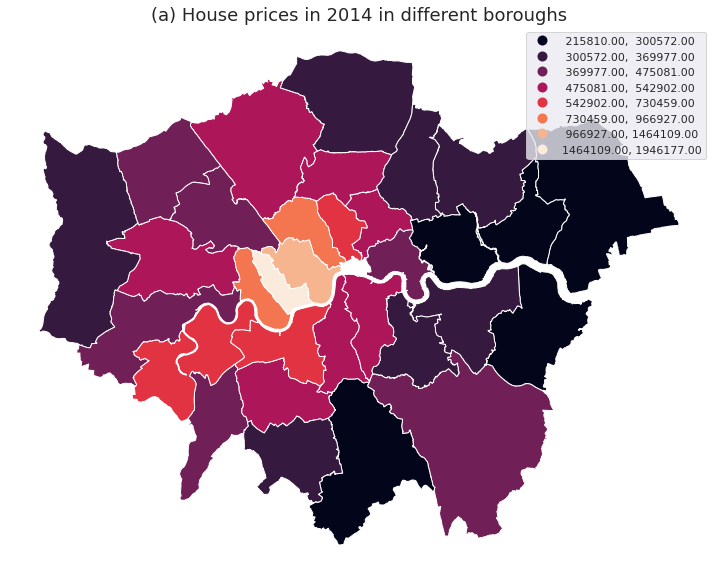

In [156]:
#map1 house price change rate
gdf_df_all_borough = gdf_df_all_borough.set_geometry('geometry')
gdf_df_all_borough.plot(column='house_price_2014', legend=True, alpha=1, scheme='FisherJenks',k=8, figsize=(15,10))
plt.title('(a) House prices in 2014 in different boroughs', fontsize=18)
plt.axis('off')

(500648.735, 564876.965, 153596.645, 203188.055)

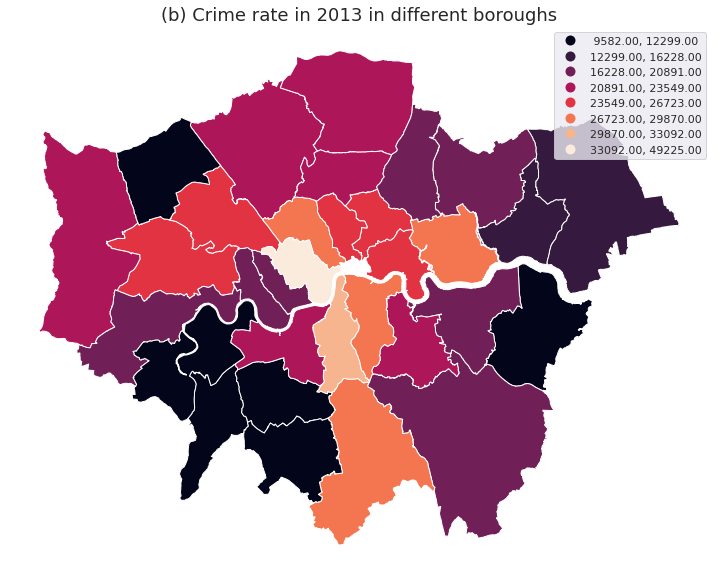

In [158]:
#map2 crime change rate
gdf_df_all_borough = gdf_df_all_borough.set_geometry('geometry')
gdf_df_all_borough.plot(column='crime_2014', legend=True, alpha=1,scheme='FisherJenks',k=8, figsize=(15,10))
plt.title('(b) Crime rate in 2013 in different boroughs', fontsize=18)
plt.axis('off')

### build the modle

In [61]:
regression_result = sm.OLS(endog=df_all[['house_price_changerate_1415']], exog=sm.add_constant(df_all[['crime_changerate_1415']])).fit()
regression_result.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     house_price_changerate_1415   R-squared:                       0.003
Model:                                     OLS   Adj. R-squared:                 -0.030
Method:                          Least Squares   F-statistic:                   0.09978
Date:                         Mon, 17 Jan 2022   Prob (F-statistic):              0.754
Time:                                 04:18:44   Log-Likelihood:                 49.596
No. Observations:                           32   AIC:                            -95.19
Df Residuals:                               30   BIC:                            -92.26
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0830      0.012      7.107      0.000       0.059       0.107
crime_changerate_1415     0.0050      0.016      0.316      0.754      -0.027       0.037
==============================================================================
Omnibus:                        5.736   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                4.116
Skew:                          -0.796   Prob(JB):                        0.128
Kurtosis:                       3.743   Cond. No.                         2.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
regression_result = sm.OLS(endog=df_all[['house_price_changerate_1516']], exog=sm.add_constant(df_all[['crime_2014']])).fit()
regression_result.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     house_price_changerate_1516   R-squared:                       0.014
Model:                                     OLS   Adj. R-squared:                 -0.019
Method:                          Least Squares   F-statistic:                    0.4343
Date:                         Tue, 18 Jan 2022   Prob (F-statistic):              0.515
Time:                                 13:37:25   Log-Likelihood:                 51.266
No. Observations:                           32   AIC:                            -98.53
Df Residuals:                               30   BIC:                            -95.60
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0666      0.027      2.504      0.018       0.012       0.121
crime_2014  7.554e-07   1.15e-06      0.659      0.515   -1.59e-06     3.1e-06
==============================================================================
Omnibus:                        1.728   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.421   Jarque-Bera (JB):                1.176
Skew:                           0.183   Prob(JB):                        0.556
Kurtosis:                       2.136   Cond. No.                     6.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
regression_result = sm.OLS(endog=df_all[['house_price_2016']], exog=sm.add_constant(df_all[['crime_changerate_1314']])).fit()
regression_result.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       house_price_2016   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                 0.0003922
Date:                Mon, 17 Jan 2022   Prob (F-statistic):              0.984
Time:                        04:21:50   Log-Likelihood:                -453.35
No. Observations:                  32   AIC:                             910.7
Df Residuals:                      30   BIC:                             913.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.176e+05   8.88e+04      6.952      0.000    4.36e+05    7.99e+05
crime_changerate_1314 -2818.3671   1.42e+05     -0.020      0.984   -2.93e+05    2.88e+05
==============================================================================
Omnibus:                       34.541   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.045
Skew:                           2.482   Prob(JB):                     5.62e-19
Kurtosis:                       9.195   Cond. No.                         2.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Columns: 134 entries, Borough to 201812
dtypes: int64(132), object(2)
memory usage: 301.6+ KB


### different crime types

In [94]:
#load all data with all kinds crime dataset
url = 'https://raw.githubusercontent.com/mrborin/CASA007QM/main/df_all_crime.csv'
df_all_alltypecrime = pd.read_csv(url, low_memory=False,thousands=',' )
df_all_alltypecrime

,Unnamed: 0,Borough,crime_total_2013,crime_total_2014,crime_total_2015,crime_total_changerate_1314,crime_total_changerate_1415,Code,house_price_2013,house_price_2014,...,house_price_changerate_1516,crime_Burglary_2013,crime_CriminalDamage_2013,crime_Drugs_2013,crime_FraudorForgery_2013,crime_OtherNotifiableOffences_2013,crime_Robbery_2013,crime_SexualOffences_2013,crime_TheftandHandling_2013,crime_ViolenceAgainstPerson_2013
0,0,Barking and Dagenham,16535,16228,17180,-0.444139,0.256828,E09000002,187943,215810,...,0.184536,2243,1644,1278,90,292,539,289,6204,3956
1,1,Barnet,23214,23035,24623,-0.593837,1.002907,E09000003,479968,534786,...,0.030568,4274,1876,1047,232,305,800,350,9995,4335
2,2,Bexley,11914,12204,12346,-0.706678,0.281842,E09000004,236952,267268,...,0.153640,1793,1441,855,101,226,277,207,4265,2749
3,3,Brent,24684,25211,25628,-0.618199,0.052455,E09000005,429877,468859,...,0.022071,3092,2016,3512,152,441,1175,359,7836,6101
4,4,Bromley,19488,20185,21100,-0.478768,0.379417,E09000006,354045,397487,...,0.082565,3136,2010,1069,78,280,578,297,7786,4254
5,5,Camden,29303,27939,30345,-0.235871,0.259977,E09000007,836170,966927,...,0.022319,3100,1567,2195,165,428,897,337,16017,4597
6,6,Croydon,28451,28347,29332,-0.679226,0.363907,E09000008,271891,300572,...,0.091810,3978,2839,2146,123,412,1731,517,10423,6282
7,7,Ealing,26733,25712,27012,-1.006581,0.323379,E09000009,427847,501526,...,0.054674,3584,2261,1928,162,435,937,463,10599,6364
8,8,Enfield,22355,22412,22842,-0.153261,0.034543,E09000010,309261,350007,...,0.154887,3468,1994,1635,128,347,950,340,8926,4567
9,9,Greenwich,19742,20624,21614,-0.186324,0.331749,E09000011,330113,369977,...,0.110482,2391,2043,1312,127,401,475,337,7503,5153


Text(0.5, 1.0, 'Correlation Matrix')

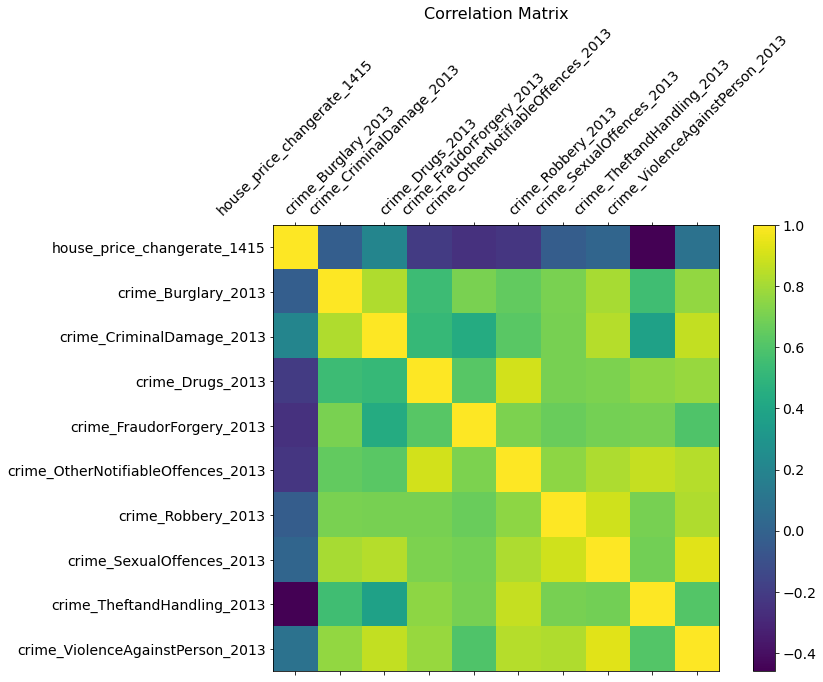

In [107]:
#check Multicollinearity
#Checking the correlation between variables
df = df_all_alltypecrime[['house_price_changerate_1415','crime_Burglary_2013','crime_CriminalDamage_2013','crime_Drugs_2013','crime_FraudorForgery_2013','crime_OtherNotifiableOffences_2013','crime_Robbery_2013','crime_SexualOffences_2013','crime_TheftandHandling_2013','crime_ViolenceAgainstPerson_2013']]
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(12, 8))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

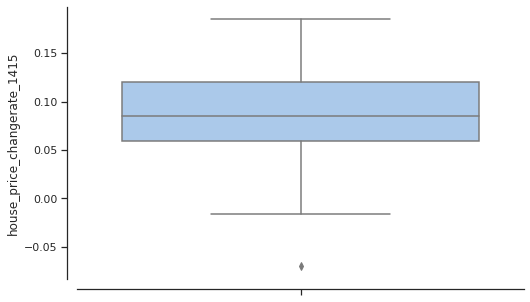

In [169]:
#outliers
sns.set_style('whitegrid')
sns.set_theme(style="ticks", palette="pastel")
f,ax = plt.subplots(figsize=(8,5))
sns.boxplot(y=df_all_alltypecrime.house_price_changerate_1415)
sns.despine(offset=10)
#ax.set_ylim([0,500])

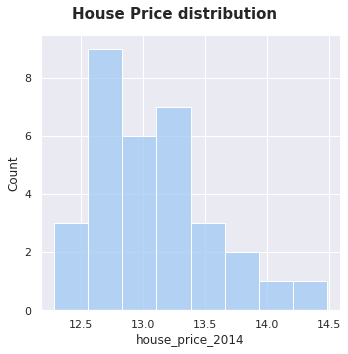

In [164]:
#distribution plot 1
sns.set_style('darkgrid')
ax = sns.displot(df_all_alltypecrime.house_price_2014.apply(np.log))
#ax.set(xlabel='Standardised Price', ylabel='Number of Boroughs')
plt.gcf().subplots_adjust(top=0.9)
plt.gcf().suptitle('Logged House Price Distribution', fontsize=15, fontweight='bold');

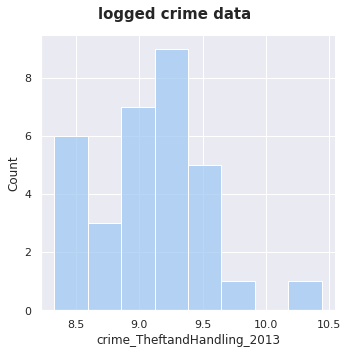

In [148]:
#distribution plot 2
sns.set_style('darkgrid')
ax = sns.displot(df.crime_TheftandHandling_2013.apply(np.log))

plt.gcf().subplots_adjust(top=0.9)
plt.gcf().suptitle('Logged Crime Data', fontsize=15, fontweight='bold');

In [149]:
#'crime_Burglary_2013','crime_CriminalDamage_2013','crime_Drugs_2013','crime_FraudorForgery_2013','crime_OtherNotifiableOffences_2013','crime_Robbery_2013','crime_SexualOffences_2013','crime_TheftandHandling_2013','crime_ViolenceAgainstPerson_2013'
df.crime_Burglary_2013 = df.crime_Burglary_2013.apply(np.log)
df.crime_CriminalDamage_2013 = df.crime_CriminalDamage_2013.apply(np.log)
df.crime_Drugs_2013 = df.crime_Drugs_2013.apply(np.log)
df.crime_OtherNotifiableOffences_2013 = df.crime_OtherNotifiableOffences_2013.apply(np.log)
df.crime_Robbery_2013 = df.crime_Robbery_2013.apply(np.log)
df.crime_SexualOffences_2013 = df.crime_SexualOffences_2013.apply(np.log)
df.crime_TheftandHandling_2013 = df.crime_TheftandHandling_2013.apply(np.log)
df.crime_ViolenceAgainstPerson_2013 = df.crime_ViolenceAgainstPerson_2013.apply(np.log)


/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [165]:
df_all_alltypecrime['house_price_changerate_1415_log'] = df_all_alltypecrime.house_price_2014.apply(np.log)

In [150]:
#Using VIF to deal with multicollinearity
# calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [151]:
df_new = drop_column_using_vif_(df.drop('house_price_changerate_1415', axis=1))

Dropping: crime_ViolenceAgainstPerson_2013
Dropping: crime_SexualOffences_2013
Dropping: crime_OtherNotifiableOffences_2013
Dropping: crime_Burglary_2013
Dropping: crime_Robbery_2013


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [167]:
regression_result = sm.OLS(endog=df_all_alltypecrime[['house_price_changerate_1415_log']], exog=sm.add_constant(df_new)).fit()
regression_result.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     house_price_changerate_1415_log   R-squared:                       0.708
Model:                                         OLS   Adj. R-squared:                  0.664
Method:                              Least Squares   F-statistic:                     16.34
Date:                             Tue, 18 Jan 2022   Prob (F-statistic):           6.49e-07
Time:                                     12:17:09   Log-Likelihood:                -1.8191
No. Observations:                               32   AIC:                             13.64
Df Residuals:                                   27   BIC:                             20.97
Df Model:                                        4                                         
Covariance Type:                         nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          13.9781      1.715      8.150      0.000      10.459      17.497
crime_CriminalDamage_2013      -1.2953      0.221     -5.858      0.000      -1.749      -0.842
crime_Drugs_2013               -0.0221      0.172     -0.128      0.899      -0.375       0.331
crime_FraudorForgery_2013      -0.0004      0.001     -0.293      0.772      -0.003       0.002
crime_TheftandHandling_2013     0.9870      0.196      5.024      0.000       0.584       1.390
==============================================================================
Omnibus:                        3.749   Durbin-Watson:                   2.186
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                2.870
Skew:                          -0.733   Prob(JB):                        0.238
Kurtosis:                       3.062   Cond. No.                     4.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Residual analysis

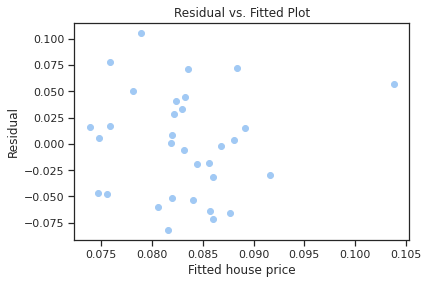

In [186]:
# plot 
plt.scatter(regression_result.fittedvalues, regression_result.resid)
# adding title and labels
plt.xlabel('Fitted house price')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot')
plt.show()

In [188]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(regression_result, 'house_price_changerate_1415_log', fig=fig)

ValueError: 'house_price_changerate_1415_log' is not in list

<Figure size 864x576 with 0 Axes>